<a href="https://colab.research.google.com/github/rogerarpagaus/Stock-Market/blob/main/LSTM_Stock_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Description: This code is predicting stock indecies of listed companies using a Long Short Term Memory (LSTM) model.
#              I will extend the code with teh option to select a ticker symbol and by give a variable historical data basis for the prediction.

In [26]:
#Import the used libraries
import math
import datetime
import yfinance as yf
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
#Get today's date
today = datetime.date.today()

In [28]:
#Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=today)
#Show the data
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03,12.388995,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04,12.455580,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05,12.593856,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06,12.725512,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09,12.705329,15.061786,15.276786,15.048214,15.196429,394024400
...,...,...,...,...,...,...
2024-12-19,249.789993,249.789993,252.000000,247.089996,247.500000,60882300
2024-12-20,254.490005,254.490005,255.000000,245.690002,248.039993,147495300


In [29]:
#Get the number of rows and columns in the data set
df.shape

(3267, 6)

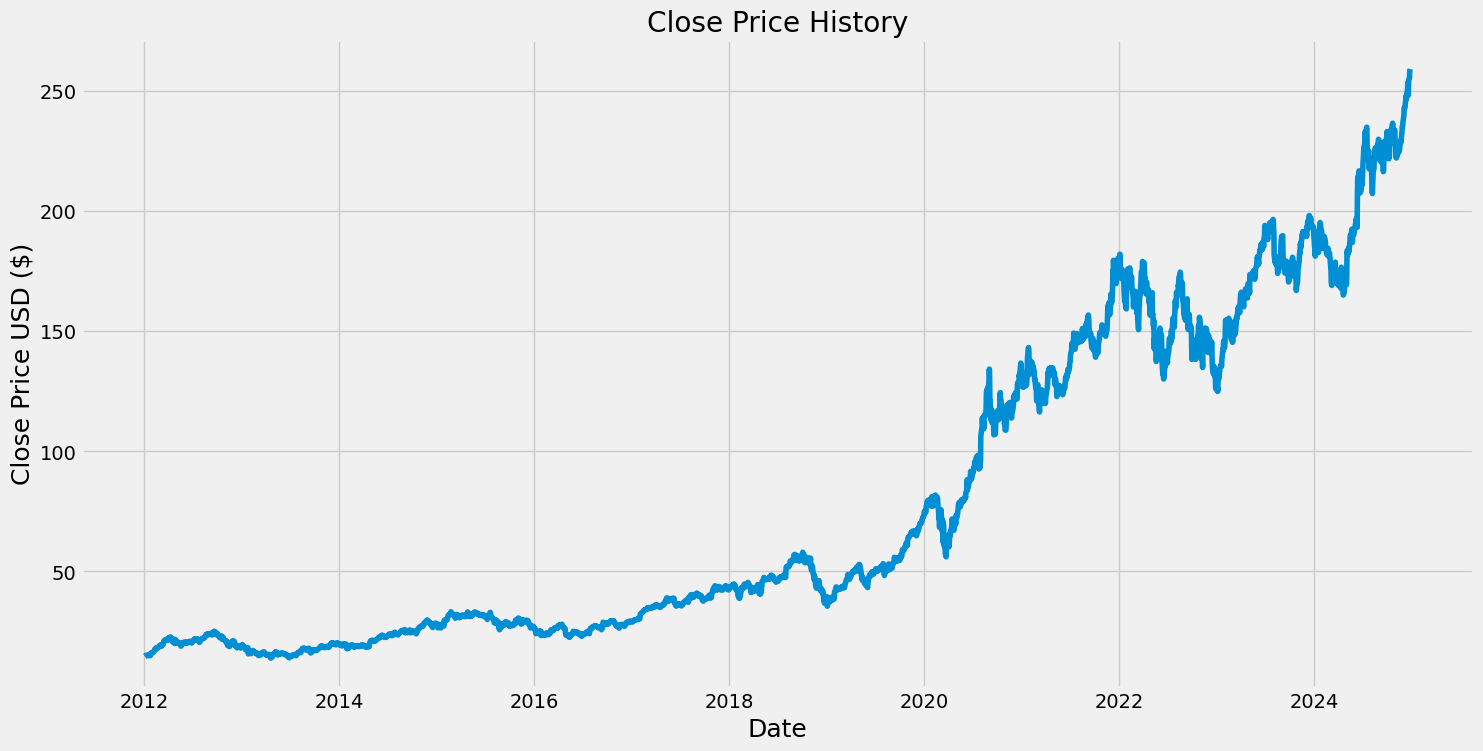

In [36]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [42]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.8 )

training_data_len

2614

In [43]:
dataset

array([], shape=(3267, 0), dtype=float64)

In [44]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

ValueError: Found array with 0 feature(s) (shape=(3267, 0)) while a minimum of 1 is required by MinMaxScaler.